In [109]:
import torch
import torchvision.datasets
import random
import numpy as np
from simple_architecture import MNISTNet
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=False, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=False, train=False)
mnist_net = MNISTNet(1400, 1).to(device)

X_train = MNIST_train.data.float().to(device)
y_train = MNIST_train.targets.to(device)
X_test = MNIST_test.data.float().to(device)
y_test = MNIST_test.targets.to(device)


In [ ]:
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

In [ ]:
lr = 1.0e-3
batch_size = 2900
n_epoch = 600
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

test_loss_history = []
test_accuracy_history = []

for epoch in range(n_epoch):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        preds = mnist_net.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()
        test_preds = mnist_net.forward(X_test)
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
        test_loss_history.append(loss_value.item())
        test_accuracy_history.append(accuracy.item())



In [ ]:
def calculating(n_hidden_neurons, n_hidden_layers, lr, batch_size, n_epoch):
    mnist_net = MNISTNet(n_hidden_neurons, n_hidden_layers).to(device)
    optimizer = torch.optim.Adam(mnist_net.parameters(), lr=lr)
    loss = torch.nn.CrossEntropyLoss()
    test_accuracy_history = []
    for epoch in range(n_epoch):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            preds = mnist_net.forward(X_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()
            test_preds = mnist_net.forward(X_test)
            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
        test_accuracy_history.append(accuracy.item())
        print(f'epoch={epoch}, accuracy={accuracy}, loss={loss_value}')
    return test_accuracy_history

In [ ]:
hid_neurons = []
hid_layers = []
bs = []
learning_rate = []
for lr in [1, 0.1, 0.01, 1.0e-3, 1.0e-4, 1.0e-5]:
    learning_rate.append((calculating(1400, 1, lr, 2900, 100), lr))
for neurons in range(1000, 5001, 1000):
    hid_neurons.append((calculating(neurons, 1, 0.01, 2900, 100), neurons))
for layers in range(1, 5):
    hid_layers.append((calculating(1400, layers, 0.01, 2900, 100), layers))
for batch in range(1000, 3001, 100):
    bs.append((calculating(1400, 1, 0.01, batch, 100), batch))


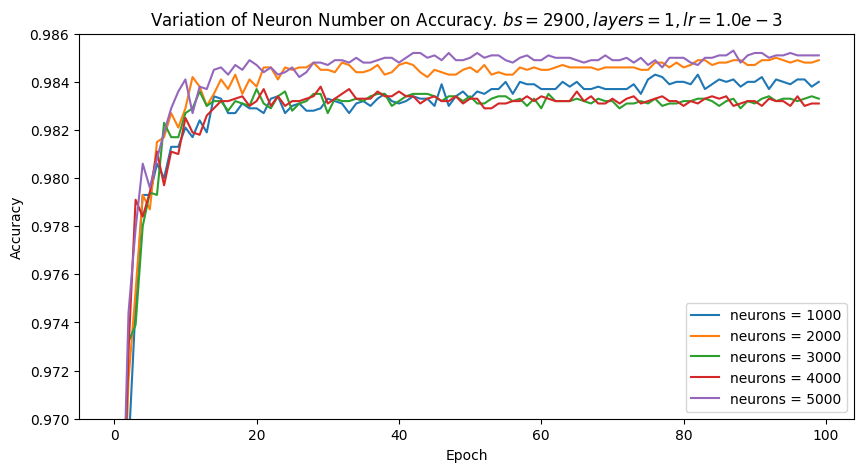

In [ ]:
plt.figure(figsize=(10, 5))
for gr in hid_neurons:
    plt.plot(gr[0], label=f'neurons = {gr[1]}')
plt.legend()
plt.title('Variation of Neuron Number on Accuracy. $bs = 2900, layers = 1, lr = 1.0e-3$')
plt.ylim(0.97, 0.986)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

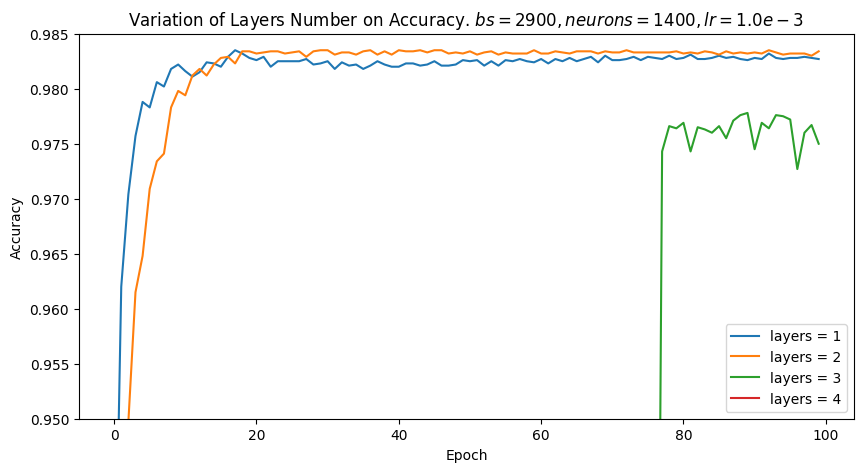

In [ ]:
plt.figure(figsize=(10, 5))
for gr in hid_layers:
    plt.plot(gr[0], label=f'layers = {gr[1]}')
plt.legend()
plt.title('Variation of Layers Number on Accuracy. $bs = 2900, neurons = 1400, lr = 1.0e-3$')
plt.ylim(0.95, 0.985)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

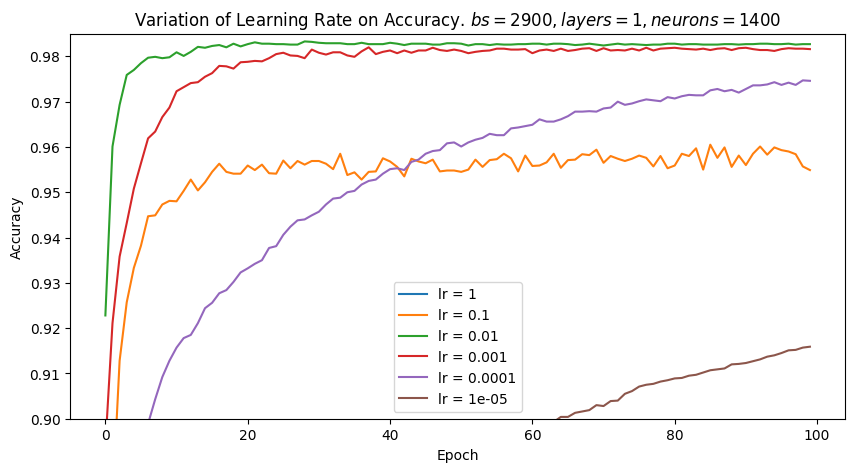

In [ ]:
plt.figure(figsize=(10, 5))
for gr in learning_rate:
    plt.plot(gr[0], label=f'lr = {gr[1]}')
plt.legend()
plt.title('Variation of Learning Rate on Accuracy. $bs = 2900, layers = 1, neurons = 1400$')
plt.ylabel('Accuracy')
plt.ylim(0.9, 0.985)
plt.xlabel('Epoch')
plt.show()

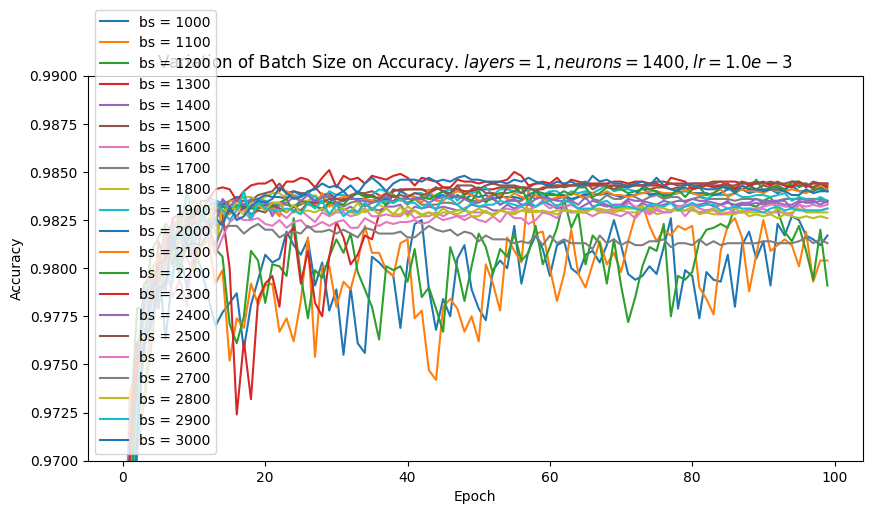

In [ ]:
plt.figure(figsize=(10, 5))
for gr in bs:
    plt.plot(gr[0], label=f'bs = {gr[1]}')
plt.legend()
plt.title('Variation of Batch Size on Accuracy. $layers = 1, neurons = 1400, lr = 1.0e-3$')
plt.ylim(0.97, 0.99)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [ ]:
final = calculating(1400, 1, 0.01, 2900, 100)
plt.plot(final)
plt.title('Final Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

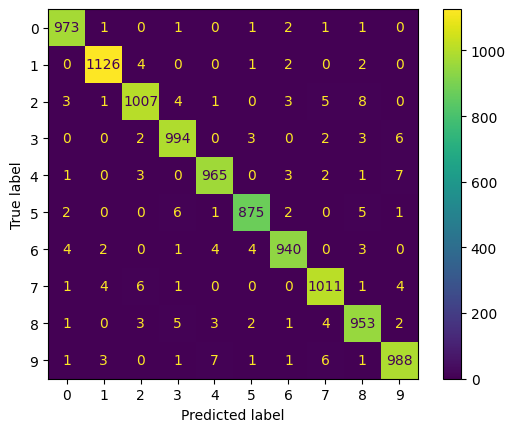

In [ ]:
#Confusion Matrix

mnist_net = MNISTNet(1400, 1).to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-2)

for epoch in range(1, 101):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        preds = mnist_net.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()
        test_preds = mnist_net.forward(X_test)

actual = y_test.cpu().numpy()
predicted = test_preds.argmax(dim=1).cpu().numpy()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)
cmdisp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cmdisp.plot()
plt.show()